In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Class_heart_attack.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
X=data.drop('target',axis=1)
Y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=0,stratify=Y)

In [ ]:
xtrain.mean()

age          54.330396
sex           0.709251
cp            0.973568
trestbps    131.775330
chol        243.942731
fbs           0.167401
restecg       0.541850
thalach     149.440529
exang         0.312775
oldpeak       1.022467
slope         1.396476
ca            0.744493
thal          2.321586
dtype: float64

In [ ]:
ytrain.mean()

0.5462555066079295

In [ ]:
xtest.mean()

age          54.473684
sex           0.605263
cp            0.947368
trestbps    131.171053
chol        253.197368
fbs           0.092105
restecg       0.486842
thalach     150.263158
exang         0.368421
oldpeak       1.090789
slope         1.407895
ca            0.684211
thal          2.289474
dtype: float64

In [ ]:
ytest.mean()

0.5394736842105263

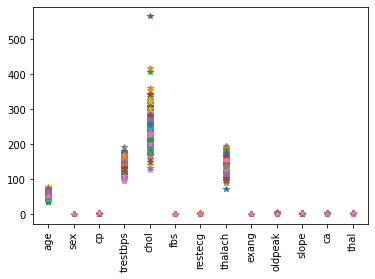

In [ ]:
plt.plot(xtrain.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
xnewtrain=xtrain.apply(pd.cut,bins=2,labels=[1,0]).values

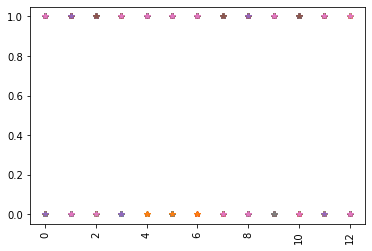

In [ ]:
plt.plot(xnewtrain.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
xnewtest=xtest.apply(pd.cut,bins=2,labels=[1,0]).values

In [ ]:
xnewtrain

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=object)

MP NEURON MODEL

In [ ]:
for b in range(xnewtrain.shape[1]+1):
  ypred = []
  accurate_rows=0
  for x,y in zip(xnewtrain,ytrain):
    pre=(np.sum(x)>=b)
    ypred.append(pre)
    accurate_rows += (y==pre)
  print(b, accurate_rows/xnewtrain.shape[0])

0 0.5462555066079295
1 0.5462555066079295
2 0.5462555066079295
3 0.5462555066079295
4 0.5462555066079295
5 0.5462555066079295
6 0.5374449339207048
7 0.5418502202643172
8 0.5506607929515418
9 0.5418502202643172
10 0.4977973568281938
11 0.4845814977973568
12 0.46255506607929514
13 0.45374449339207046


In [ ]:
ypred1=[]
for x in xnewtest:
  pred=np.sum(x)>=b
  ypred1.append(pred)
print(accuracy_score(ytest,ypred1))

0.4605263157894737


MP NEURON OBJECT ORIENTED

In [ ]:
class MPNeuron:
  def __init__(self):
    self.b=None

  def model(self, x):
    return(np.sum(x)>=self.b)

  def predict(self,X):
    Y=[]
    for x in X:
      res=self.model(x)
      Y.append(res)
    return np.array(Y) 

  def fit(self,X,Y):
    accuracy={}
    for b in range(X.shape[1]+1):
      self.b=b
      ypred=self.predict(X)
      accuracy[b]=accuracy_score(Y,ypred)
    b_best=max(accuracy,key=accuracy.get)
    self.b=b_best
    print('best value of b= ', b_best)
    print('Maximum Accuracy= ', accuracy[b_best])

In [ ]:
model = MPNeuron()
model.fit(xnewtrain,ytrain)

best value of b=  8
Maximum Accuracy=  0.5506607929515418


In [ ]:
ypred_train=model.predict(xnewtrain)
print(accuracy_score(ytrain, ypred_train))

0.5506607929515418


In [ ]:
ypred_train=model.predict(xnewtest)
print(accuracy_score(ytest, ypred_train))

0.5657894736842105


Perceptron Learning Algorithm

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xp = data.drop('target',axis=1)
Yp = data['target']

In [ ]:
Xptrain,Xptest,Yptrain,Yptest = train_test_split(Xp,Yp,random_state=0,stratify=Y)

In [ ]:
Xptrain=Xptrain.values
Yptrain=Yptrain.values

In [ ]:
class Perceptron:
  def __init__(self):
    self.w=None
    self.b=None

  def model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 2

  def predict(self,x):
    y=[]
    for X in x:
      res=self.model(X)
      y.append(res)
    return np.array(y)

  def fit(self,x,y,epoches,lr):
    self.w = np.ones(x.shape[1])
    self.b = 0
    accuracy={}
    max_acc=0

    for i in range(epoches):
      for X,Y in zip(x,y):
        y_pred = self.model(X)
        if Y==1 and y_pred ==0:
          self.w=self.w+(lr*X)
          self.b=self.b-lr * 1
        elif Y==0 and y_pred ==1:
          self.w=self.w-(lr*X)
          self.b=self.b+lr * 1
      accuracy[i] = accuracy_score(self.predict(x),y)
      if(accuracy[i]>max_acc):
        max_acc=accuracy[i]
    print(accuracy)
    print(max_acc)

In [ ]:
model=Perceptron()
model.fit(Xptrain,Yptrain,0.0001,10)

KeyboardInterrupt: ignored

In [ ]:
ypred_train_p=model.predict(Xptrain)
print(accuracy_score(Yptrain, ypred_train_p))

In [ ]:
ypred_train_p = model.predict(Xptest.values)
print(accuracy_score(Yptest, ypred_train_p))